In [1]:
#Lets import required packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv(r'E:\Study\DataChallenges\AV\LoanPredicton\train.csv')
test = pd.read_csv(r'E:\Study\DataChallenges\AV\LoanPredicton\test.csv')

In [3]:
print(train.shape)
train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
print(train.Gender.value_counts(dropna=False))
print(test.Gender.value_counts(dropna=False))

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
Male      286
Female     70
NaN        11
Name: Gender, dtype: int64


In [10]:
print(train.Married.value_counts(dropna=False))
print(test.Married.value_counts(dropna=False))

Yes    398
No     213
NaN      3
Name: Married, dtype: int64
Yes    233
No     134
Name: Married, dtype: int64


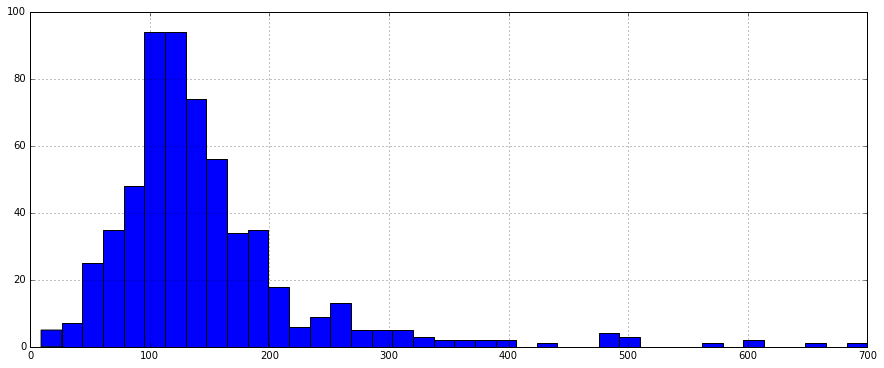

In [21]:
train['LoanAmount'].hist(bins = 40,figsize = (15,6))

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x2ac398e83c8>],
 'caps': [<matplotlib.lines.Line2D at 0x2ac398efe48>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ac398f3ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2ac398f37b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2ac398e8dd8>,
  <matplotlib.lines.Line2D at 0x2ac398e8ef0>]}

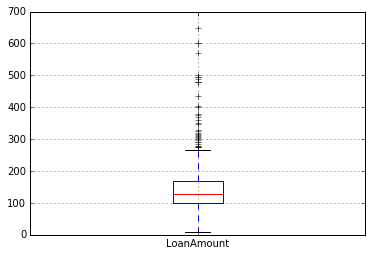

In [26]:
train.boxplot(column='LoanAmount')

In [27]:
credit_count = train.Credit_History.value_counts()

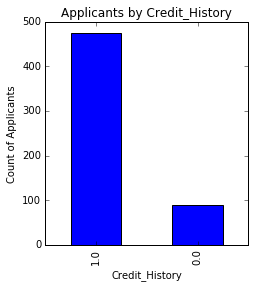

In [48]:
figure = plt.figure(figsize=(8,4))
axis = figure.add_subplot(121)
axis.set_xlabel('Credit_History')
axis.set_ylabel('Count of Applicants')
axis.set_title("Applicants by Credit_History")
credit_count.plot(kind='bar')

In [60]:
credit_vs_LoanStatus = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Gender_vs_LoanStatus = pd.crosstab(train['Gender'], train['Loan_Status'])

In [61]:
credit_vs_LoanStatus

Loan_Status,N,Y
Credit_History,,
0,82,7
1,97,378


In [57]:
Gender_vs_LoanStatus

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


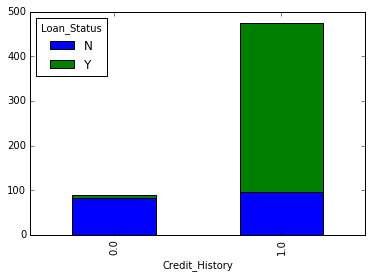

In [58]:
credit_vs_LoanStatus.plot(kind = 'bar',stacked = True)

In [77]:
x = train.pivot_table(values = 'LoanAmount',columns= 'Loan_Status')
x

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

In [80]:
y = train.pivot_table(values = 'Loan_Status', columns = 'Credit_History',aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
y

Credit_History
0    0.078652
1    0.795789
Name: Loan_Status, dtype: float64